# Airbnb Data Analysis

In [1]:
# pip install numpy pandas matplotlib seaborn

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Airbnb dataset into a pandas DataFrame
df = pd.read_csv("./data/airbnbdata.csv", low_memory=False)

In [3]:
# Display the first few rows of the DataFrame to understand its structure and data
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# Display the column names of the DataFrame
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

### Checking missing values

In [5]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
# Display the summary information of the DataFrame to understand its structure, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

### Handling missing values

In [7]:
# Convert the 'last review' column to datetime format, coercing errors to handle invalid dates
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [8]:
# Display the summary information of the DataFrame to understand its structure, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [9]:
# Fill missing values in 'reviews per month' with 0
# Fill missing values in 'last review' with the earliest date in the column
df.fillna({'reviews per month' : 0, 'last review': df['last review'].min()}, inplace=True)

In [10]:
# Drop rows where 'NAME' or 'host name' columns have missing values
df.dropna(subset=['NAME','host name'], inplace=True)

In [11]:
# Drop rows where 'country' or 'country code' columns have missing values
df.dropna(subset=['country', 'country code'], inplace=True)
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               272
host name                              0
neighbourhood group                   25
neighbourhood                         14
lat                                    8
long                                   8
country                                0
country code                           0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                    196
price                                234
service fee                          264
minimum nights                       398
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   303
calculated host listings count       318
availability 365                     415
house_rules     

In [12]:
# Drop the columns 'license' and 'house_rules' from the DataFrame if they exist
df = df.drop(columns=['license','house_rules'], errors='ignore')

In [13]:
# Display the first few rows of the DataFrame to verify the changes made in the previous steps
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [14]:
# Remove dollar signs and commas from 'price' and 'service fee' columns, and convert them to float
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace(r'[\$,]', '', regex=True).astype(float)

In [15]:
# Display the first few rows of the DataFrame to verify the changes made in the previous steps
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


### Remove duplicates

In [16]:
# Remove duplicate rows from the DataFrame to ensure data consistency
df.drop_duplicates(inplace=True)

In [17]:
# Display the summary information of the DataFrame to understand its structure, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100844 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              100844 non-null  int64         
 1   NAME                            100844 non-null  object        
 2   host id                         100844 non-null  int64         
 3   host_identity_verified          100572 non-null  object        
 4   host name                       100844 non-null  object        
 5   neighbourhood group             100819 non-null  object        
 6   neighbourhood                   100830 non-null  object        
 7   lat                             100836 non-null  float64       
 8   long                            100836 non-null  float64       
 9   country                         100844 non-null  object        
 10  country code                    100844 non-null  object      

### Descriptive Statistics

In [18]:
# Generate descriptive statistics for the DataFrame
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.008440e+05,1.008440e+05,100836.000000,100836.000000,100648.000000,100610.000000,100580.000000,100455.000000,100662.000000,100844,100844.000000,100548.000000,100526.000000,100429.000000
mean,2.916851e+07,4.926116e+10,40.728088,-73.949643,2012.488475,625.487297,125.067727,8.105948,27.476466,2018-05-13 01:34:06.106857728,1.163653,3.277947,7.955812,141.138068
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.505668e+07,2.458360e+10,40.688730,-73.982560,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-29 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913191e+07,4.911833e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.323806e+07,7.400587e+10,40.762750,-73.932330,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625044e+07,2.854391e+10,0.055846,0.049491,5.764498,331.727412,66.336883,30.431410,49.532130,NaN,1.685709,1.285602,32.384068,135.419046


## Data Visualization

Q1. What is the distribution of listing prices?

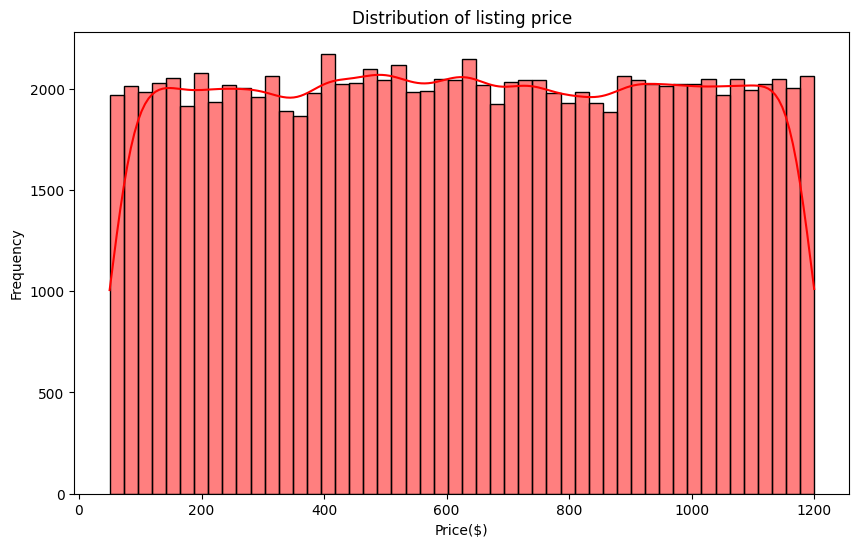

In [19]:
# Plot the distribution of listing prices using a histogram with KDE
plt.figure(figsize = (10,6))
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title("Distribution of listing price")
plt.xlabel("Price($)")
plt.ylabel("Frequency")
plt.show()

Q2. How are different room types distributed?

In [20]:
# Display the unique values in the 'room type' column to understand the different categories available
df['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 100844, dtype: object

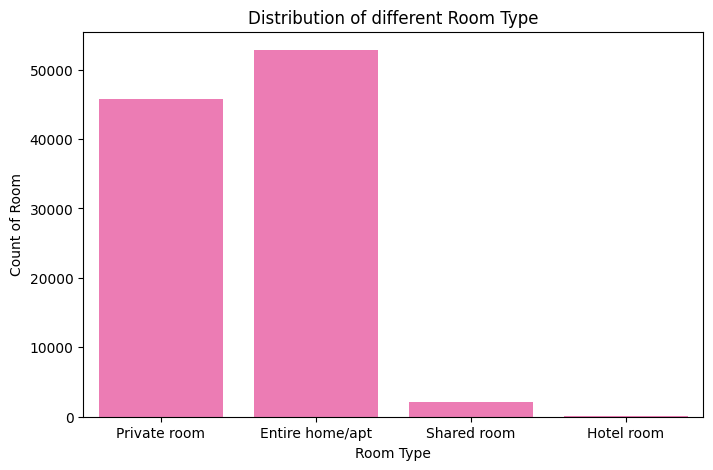

In [21]:
# Plot the count of different room types in the dataset
plt.figure(figsize=(8,5))
sns.countplot(x='room type', data=df, color='hotpink')
plt.title("Distribution of different Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count of Room")
plt.show()

Q3. How to listings distributed across different neighborhood?

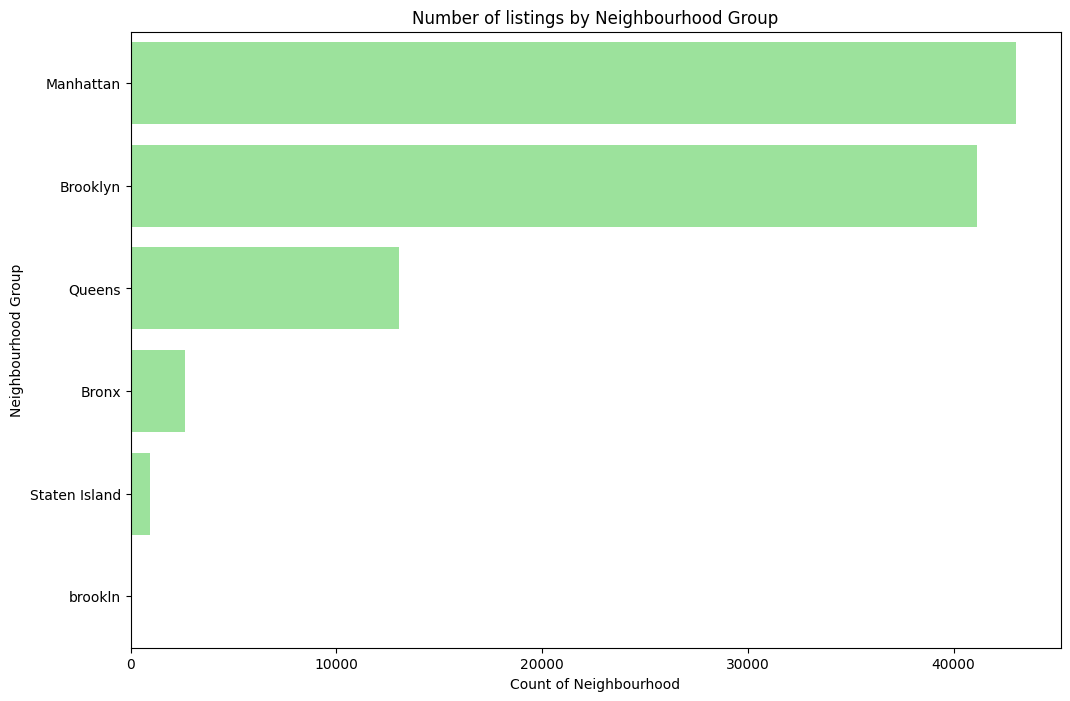

In [22]:
# Plot the count of listings by neighbourhood group in descending order
plt.figure(figsize=(12,8))
sns.countplot(y="neighbourhood group", data=df, color='lightgreen', order=df['neighbourhood group'].value_counts().index)
plt.title("Number of listings by Neighbourhood Group")
plt.xlabel("Count of Neighbourhood")
plt.ylabel("Neighbourhood Group")
plt.show()

Q4. What is the relationship between price and room type?

C:\Users\Dipankar Majumdar\AppData\Local\Temp\ipykernel_6232\2171799627.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Room Type')  # Use ax.legend() instead of plt.legend()


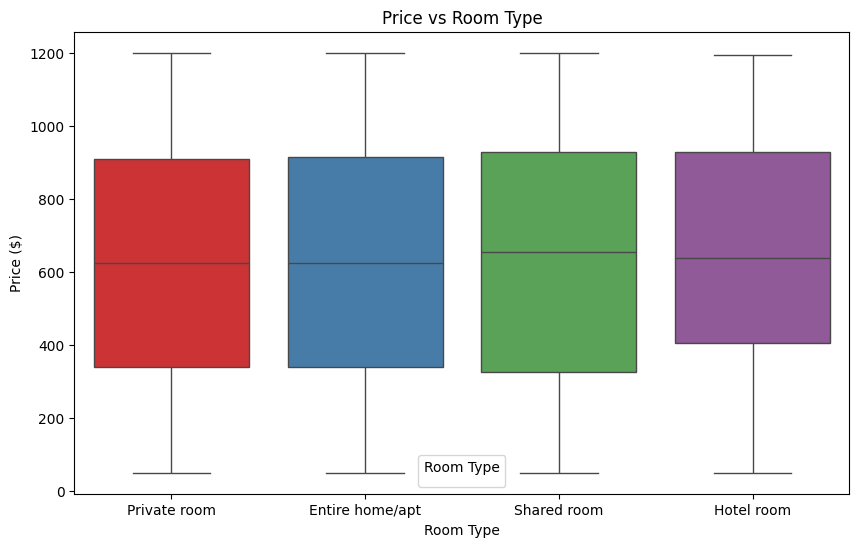

In [23]:
# Create a boxplot to visualize the relationship between room type and price
plt.figure(figsize=(10,6))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set1')
plt.title("Price vs Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.legend(title='Room Type')  # Use ax.legend() instead of plt.legend()
plt.show()

Q5. How has the number of reviews change over with time?

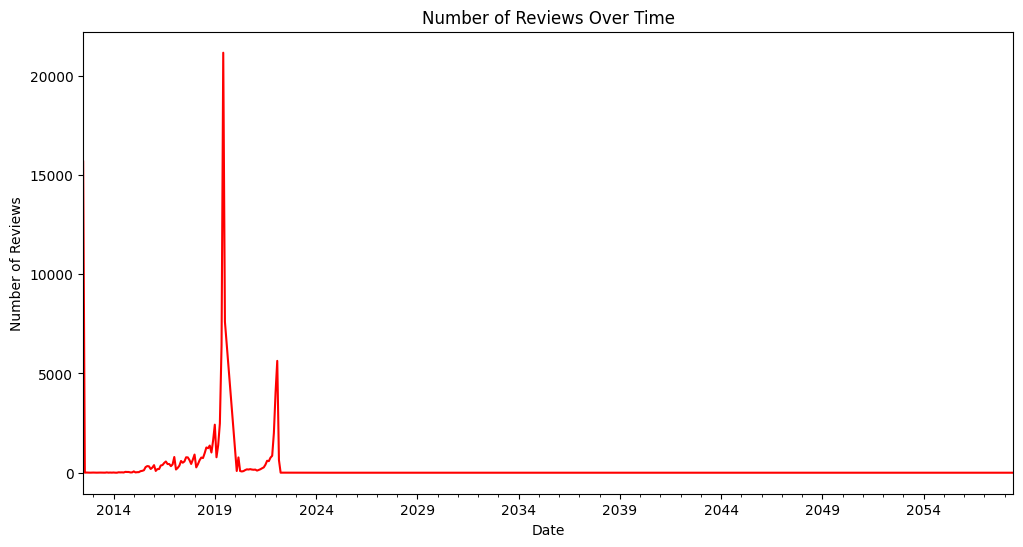

In [24]:
# Group the data by the 'last review' column, aggregated by month, and count the number of reviews for each month
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
reviews_over_time.plot(kind='line', color='red')
plt.title("Number of Reviews Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

### 🏠 **Airbnb Data Analysis Project**

#### 1️⃣ **Introduction**
- The project aims to analyze Airbnb listing data to uncover insights about pricing, room types, neighborhoods, and trends over time.

---

#### 2️⃣ **Data Loading and Exploration**
- **📥 Load Data**: The dataset is loaded into a pandas DataFrame (`df`) from a CSV file.
- **🔍 Initial Exploration**:
    - Display the first few rows of the dataset to understand its structure.
    - Check column names and data types.
    - Identify missing values and inconsistencies.

---

#### 3️⃣ **Data Cleaning**
- **🧹 Handle Missing Values**:
    - Convert the `last review` column to datetime format.
    - Fill missing values in `reviews per month` with `0` and `last review` with the earliest date.
    - Drop rows with missing values in critical columns like `NAME`, `host name`, `country`, and `country code`.
- **🗑️ Remove Unnecessary Columns**:
    - Drop columns like `license` and `house_rules` if they exist.
- **💲 Clean Price Data**:
    - Remove dollar signs and commas from `price` and `service fee` columns and convert them to numeric types.
- **🗂️ Remove Duplicates**:
    - Ensure data consistency by dropping duplicate rows.

---

#### 4️⃣ **Descriptive Statistics**
- **📊 Summary Statistics**:
    - Generate descriptive statistics to understand the distribution of numerical columns.

---

#### 5️⃣ **Data Visualization**
- **📈 Visual Insights**:
    - **Q1**: Distribution of listing prices using a histogram with KDE.
    - **Q2**: Distribution of room types using a bar chart.
    - **Q3**: Listings across neighborhoods using a count plot.
    - **Q4**: Relationship between price and room type using a boxplot.
    - **Q5**: Trends in the number of reviews over time using a line plot.

---

#### 6️⃣ **Key Variables**
- **`df`**: The cleaned and processed DataFrame containing Airbnb listing data.
- **`reviews_over_time`**: A Series showing the number of reviews aggregated by month.

---

#### 7️⃣ **Conclusion**
- The project provides insights into Airbnb listings, helping hosts and guests make informed decisions. 🎉
